In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data2 = pd.read_csv('COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv')

In [3]:
data2

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_12Plus,...,Administered_Dose1_Recip_5PlusPop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Administered_5Plus,Admin_Per_100k_5Plus,Distributed_Per_100k_5Plus,Series_Complete_Moderna_5Plus,Series_Complete_Pfizer_5Plus,Series_Complete_Janssen_5Plus,Series_Complete_Unk_Manuf_5Plus
0,05/13/2022,19,MA,17188110,619300,6535820,10032990,0,249374,285671,...,95.0,5457704.0,83.5,14991382.0,229396.0,263011.0,1922076.0,3153440.0,381977.0,211.0
1,05/13/2022,19,DE,2398555,100100,929000,1369455,0,246318,285608,...,88.3,675457.0,73.5,1831610.0,199295.0,260983.0,236793.0,380718.0,57220.0,726.0
2,05/13/2022,19,VA,19930285,784600,7104400,12041285,0,233498,272757,...,91.2,6260517.0,78.0,16609124.0,206837.0,248197.0,2027379.0,3772912.0,456375.0,3851.0
3,05/13/2022,19,GU,320560,24100,85780,210680,0,190256,244113,...,95.0,139743.0,91.5,353735.0,231561.0,209844.0,40648.0,87806.0,11176.0,113.0
4,05/13/2022,19,NV,6020510,259200,2068300,3693010,0,195461,229633,...,80.3,1877777.0,64.9,4930135.0,170323.0,207992.0,606490.0,1098391.0,172829.0,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33299,12/13/2020,51,LTC,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
33300,12/13/2020,51,US,13650,0,0,0,0,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
33301,12/13/2020,51,GU,3900,0,0,0,0,2353,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
33302,12/13/2020,51,MP,4875,0,0,0,0,8570,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
data2_nec = data2[['Date', 'Location', 'Administered', 'Administered_12Plus',  'Administered_18Plus', 'Administered_65Plus', 'Additional_Doses_12Plus', 'Additional_Doses_18Plus', 'Additional_Doses_50Plus', 'Additional_Doses_65Plus']]

In [5]:
data2_nec['Administered_diff'] = data2_nec['Administered'].diff().fillna(0)
data2_nec['Administered_12Plus_diff'] = data2_nec['Administered_12Plus'].diff().fillna(0)
data2_nec['Administered_18Plus_diff'] = data2_nec['Administered_18Plus'].diff().fillna(0)
data2_nec['Administered_65Plus_diff'] = data2_nec['Administered_65Plus'].diff().fillna(0)

data2_nec = data2_nec[data2_nec['Administered_diff'] >= 0.0]
data2_nec = data2_nec[data2_nec['Administered_12Plus_diff'] >= 0.0]
data2_nec = data2_nec[data2_nec['Administered_18Plus_diff'] >= 0.0]
data2_nec = data2_nec[data2_nec['Administered_65Plus_diff'] >= 0.0]


<ipython-input-5-676488a63300>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2_nec['Administered_diff'] = data2_nec['Administered'].diff().fillna(0)
<ipython-input-5-676488a63300>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2_nec['Administered_12Plus_diff'] = data2_nec['Administered_12Plus'].diff().fillna(0)
<ipython-input-5-676488a63300>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [6]:
data_dem2 = pd.read_excel('demog.xlsx')

In [7]:
data_state = pd.read_excel('state.xlsx')

In [8]:
state_series = data_state['state'].squeeze()

In [9]:
def get_info(XX, state, df2, b):
    listo = list(date_series_str)
    for x in listo:
        df = df2[df2['Date'] == XX] 
        df = df[df['Location'] == state]
        a = df[b]
        if df.size == 0:
            return float('nan')
        else:
            return a.squeeze()

In [10]:
def get_pop(state, df2, b):
    listo = list(state_series)
    for x in listo:
        df = df2[df2['state'] == state] 
        a = df[b]
        if df.size == 0:
            return float('nan')
        else:
            return a.squeeze()

In [11]:
get_pop('US', data_dem2, '65+')

52784300

In [12]:
data_date = pd.read_excel('date-vacc.xlsx')

In [13]:
date_series = data_date['date'].squeeze()
date_series_str = date_series.dt.strftime('%m/%d/%Y')

In [14]:
date_series_str

0      02/07/2022
1      02/08/2022
2      02/09/2022
3      02/10/2022
4      02/11/2022
          ...    
527    07/19/2023
528    07/20/2023
529    07/21/2023
530    07/22/2023
531    07/23/2023
Name: date, Length: 532, dtype: object

In [33]:
deb_date = '02/07/2022'
mid_date = '02/21/2022'
end_date = '04/25/2022'

old_date = '26/11/2021'
oldd_date = '25/12/2021'

state = 'US'
data_dem = (get_pop(state, data_dem2, '0_4'), get_pop(state, data_dem2, '5_11'), get_pop(state, data_dem2, '12_18'), get_pop(state, data_dem2, '19_49'), get_pop(state, data_dem2, '50_64'), get_pop(state, data_dem2, '65+'))

In [16]:
data_dem

(23533718.75,
 32947206.25,
 18826975,
 127653910.526316,
 63503489.4736842,
 52784300)

In [34]:
def primary(state):
    doses_series = pd.DataFrame(columns = ['date', '0_4', '5_11', '12_18', '19_49', '50_64', '65+'])
    cov_65 = 0
    cov_50_64 = 0
    cov_19_49 = 0
    cov_12_18 = 0
    cov_5_11 = 0

    i = 0
    deb_65 = get_info(deb_date, state, data2_nec, 'Administered_65Plus') 
    mid_65 = get_info(mid_date, state, data2_nec, 'Administered_65Plus') 
    fin_65 = get_info(end_date, state, data2_nec, 'Administered_65Plus') 

    deb_50_64 = (get_info(deb_date, state, data2_nec, 'Administered_18Plus') - get_info(deb_date, state, data2_nec, 'Administered_65Plus'))*(data_dem[4]/(data_dem[3] + data_dem[5])) 
    mid_50_64 = (get_info(mid_date, state, data2_nec, 'Administered_18Plus') - get_info(mid_date, state, data2_nec, 'Administered_65Plus'))*(data_dem[4]/(data_dem[3] + data_dem[5])) 
    fin_50_64 = (get_info(end_date, state, data2_nec, 'Administered_18Plus') - get_info(end_date, state, data2_nec, 'Administered_65Plus'))*(data_dem[4]/(data_dem[3] + data_dem[5]))  

    deb_19_49 = (get_info(deb_date, state, data2_nec, 'Administered_18Plus') - get_info(deb_date, state, data2_nec, 'Administered_65Plus'))*(data_dem[3]/(data_dem[3] + data_dem[5])) 
    mid_19_49 = (get_info(mid_date, state, data2_nec, 'Administered_18Plus') - get_info(mid_date, state, data2_nec, 'Administered_65Plus'))*(data_dem[3]/(data_dem[3] + data_dem[5]))  
    fin_19_49 = (get_info(end_date, state, data2_nec, 'Administered_18Plus') - get_info(end_date, state, data2_nec, 'Administered_65Plus'))*(data_dem[3]/(data_dem[3] + data_dem[5]))  

    deb_12_18 = (get_info(deb_date, state, data2_nec, 'Administered_12Plus') - get_info(deb_date, state, data2_nec, 'Administered_18Plus'))
    fin_12_18 = (get_info(mid_date, state, data2_nec, 'Administered_12Plus') - get_info(end_date, state, data2_nec, 'Administered_18Plus')) 
    fin_12_18 = (get_info(end_date, state, data2_nec, 'Administered_12Plus') - get_info(end_date, state, data2_nec, 'Administered_18Plus')) 


    deb_5_11 = (get_info(deb_date, state, data2_nec, 'Administered') - get_info(deb_date, state, data2_nec, 'Administered_12Plus'))
    fin_5_11 = (get_info(mid_date, state, data2_nec, 'Administered') - get_info(end_date, state, data2_nec, 'Administered_12Plus')) 
    fin_5_11 = (get_info(end_date, state, data2_nec, 'Administered') - get_info(end_date, state, data2_nec, 'Administered_12Plus')) 


    dif_65 = fin_65 - deb_65
    dif_50_64 = fin_50_64 - deb_50_64
    dif_19_49 = fin_19_49 - deb_19_49
    dif_12_18 = fin_12_18 - deb_12_18
    dif_5_11 = fin_5_11 - deb_5_11
    
    
    print(dif_65)

    for date in date_series_str:    
        if (i < 80):   

            cov_65 = deb_65 + i*dif_65/160
            cov_50_64 = deb_50_64 + i*dif_50_64/80
            cov_19_49 = deb_19_49 + i*dif_19_49/80
            cov_12_18 = deb_12_18 + i*dif_12_18/80
            cov_5_11 = deb_5_11 + i*dif_5_11/80

            i = i + 1                                                                                         
        else:
            old_cov_65 = cov_65
            old_cov_50_64 = cov_50_64
            old_cov_19_49 = cov_19_49
            old_cov_12_18 = cov_12_18
            old_cov_5_11 = cov_5_11


            cov_65 = old_cov_65

            if (old_cov_50_64 + dif_50_64/80 <= 2*0.88*data_dem[4]):
                cov_50_64 = old_cov_50_64 + dif_50_64/80
            else:
                cov_50_64 = old_cov_50_64

            if (old_cov_19_49 + dif_19_49/80 <= 2*0.9*data_dem[3]):
                cov_19_49 = old_cov_19_49 + dif_19_49/80
            else:
                cov_19_49 = old_cov_19_49

            if (old_cov_12_18 + dif_12_18/80 <= 2*0.80*data_dem[2]):
                cov_12_18 = old_cov_12_18 + dif_12_18/80
            else:
                cov_12_18 =  old_cov_12_18


            if (old_cov_5_11 + dif_5_11 <= 2*0.5*data_dem[1]):
                cov_5_11 = old_cov_5_11 + dif_5_11/80
            else:
                cov_5_11 =  old_cov_5_11



            i = i + 1
            print(i)
        if (i % 1000 == 0):
            print(i)
        doses_series = doses_series.append({'date' : date, '0_4' : 0, '5_11' : cov_5_11, '12_18' : cov_12_18, '19_49' : cov_19_49, '50_64' : cov_50_64, '65+' : cov_65}, 
                    ignore_index = True)
        
    doses_series['65_diff'] = doses_series['65+'].diff().fillna(0)
    doses_series['50_64_diff'] = doses_series['50_64'].diff().fillna(0)
    doses_series['19_49_diff'] = doses_series['19_49'].diff().fillna(0)
    doses_series['12_18_diff'] = doses_series['12_18'].diff().fillna(0)
    doses_series['5_11_diff'] = doses_series['5_11'].diff().fillna(0) 
    return doses_series

In [29]:
def booster(state):
    booster_doses2 = pd.DataFrame(columns = ['date', '0_4', '5_11', '12_18', '19_49', '50_64', '65+'])
    i = 0
    dd1_65 =  get_info(deb_date, state, data2_nec, 'Additional_Doses_65Plus')     
    dd2_65 =  get_info(end_date, state, data2_nec, 'Additional_Doses_65Plus')        
    
    dd1_50_64 =  get_info(deb_date, state, data2_nec, 'Additional_Doses_50Plus') - dd1_65
    dd2_50_64 =  get_info(end_date, state, data2_nec, 'Additional_Doses_50Plus') - dd2_65
    
    dd1_19_49 = get_info(deb_date, state, data2_nec, 'Additional_Doses_18Plus') - get_info(deb_date, state, data2_nec, 'Additional_Doses_50Plus')
    dd2_19_49 = get_info(end_date, state, data2_nec, 'Additional_Doses_18Plus') - get_info(end_date, state, data2_nec, 'Additional_Doses_50Plus')

    
    dd1_12_18 = get_info(deb_date, state, data2_nec, 'Additional_Doses_12Plus') - get_info(deb_date, state, data2_nec, 'Additional_Doses_18Plus')
    dd2_12_18 = get_info(end_date, state, data2_nec, 'Additional_Doses_12Plus') - get_info(end_date, state, data2_nec, 'Additional_Doses_18Plus')
    

    dif_65 = dd2_65 - dd1_65
    dif_50_64 = dd2_50_64 - dd1_50_64
    dif_19_49 = dd2_19_49 - dd1_19_49
    dif_12_18 = dd2_12_18 - dd1_12_18

    for date in date_series_str:    
        if (i < 80):
            cov_65 = dd1_65 + i*dif_65/80
            cov_50_64 = dd1_50_64 + i*dif_50_64/80
            cov_19_49 = dd1_19_49 + i*dif_19_49/80
            cov_12_18 = dd1_12_18 + i*dif_12_18/80
            i = i + 1  
            
        else:
            
            old_cov_65 = cov_65
            old_cov_50_64 = cov_50_64
            old_cov_19_49 = cov_19_49
            old_cov_12_18 = cov_12_18

            if (old_cov_65 + dif_65/80 <= 0.7*0.9*data_dem[5]):
                cov_65 = old_cov_65 + dif_65/80
            else:
                cov_65 = old_cov_65

            if (old_cov_50_64 + dif_50_64/80 <=  0.7*0.9*data_dem[4]):
                cov_50_64 = old_cov_50_64 + dif_50_64/80
            else:
                cov_50_64 = old_cov_50_64

            if (old_cov_19_49 + dif_19_49/80 <= 0.7*0.88*data_dem[3]):
                cov_19_49 = old_cov_19_49 + dif_19_49/80
            else:
                cov_19_49 = old_cov_19_49

            if (old_cov_12_18 + dif_12_18/80 <= 0.7*0.80*data_dem[2]):
                cov_12_18 = old_cov_12_18 + dif_12_18/80
            else:
                cov_12_18 =  old_cov_12_18
               
                
            i = i + 1
            
            
        if (i % 1000 == 0):
            print(i)
        booster_doses2 = booster_doses2.append({'date' : date, '0_4' : 0, '5_11' : 0, '12_18' : cov_12_18, '19_49' : cov_19_49, '50_64' : cov_50_64, '65+' : cov_65}, 
                ignore_index = True)
        
    booster_doses2['65_diff'] = booster_doses2['65+'].diff().fillna(0)
    booster_doses2['50_64_diff'] = booster_doses2['50_64'].diff().fillna(0)
    booster_doses2['19_49_diff'] = booster_doses2['19_49'].diff().fillna(0)
    booster_doses2['12_18_diff'] = booster_doses2['12_18'].diff().fillna(0)
    booster_doses2['5_11_diff'] = booster_doses2['5_11'].diff().fillna(0) 
    return booster_doses2

In [19]:
def booster2(state):
    booster_doses3 = pd.DataFrame(columns = ['date', '0_4', '5_11', '12_18', '19_49', '50_64', '65+'])
    i = 0
    dd1_65 =  get_info(deb_date, state, data2_nec, 'Additional_Doses_65Plus')     
    dd2_65 =  get_info(end_date, state, data2_nec, 'Additional_Doses_65Plus')        
    
    dd1_50_64 =  get_info(deb_date, state, data2_nec, 'Additional_Doses_50Plus') - dd1_65
    dd2_50_64 =  get_info(end_date, state, data2_nec, 'Additional_Doses_50Plus') - dd2_65
    
    dd1_19_49 = get_info(deb_date, state, data2_nec, 'Additional_Doses_18Plus') - get_info(deb_date, state, data2_nec, 'Additional_Doses_50Plus')
    dd2_19_49 = get_info(end_date, state, data2_nec, 'Additional_Doses_18Plus') - get_info(end_date, state, data2_nec, 'Additional_Doses_50Plus')

    
    dd1_12_18 = get_info(deb_date, state, data2_nec, 'Additional_Doses_12Plus') - get_info(deb_date, state, data2_nec, 'Additional_Doses_18Plus')
    dd2_12_18 = get_info(end_date, state, data2_nec, 'Additional_Doses_12Plus') - get_info(end_date, state, data2_nec, 'Additional_Doses_18Plus')
    

    dif_65 = dd2_65 - dd1_65
    dif_50_64 = dd2_50_64 - dd1_50_64
    dif_19_49 = dd2_19_49 - dd1_19_49
    dif_12_18 = dd2_12_18 - dd1_12_18

    for date in date_series_str:    
        if (i < 80):
            cov_65 = dd1_65 + i*dif_65/80
            cov_50_64 = dd1_50_64 + i*dif_50_64/80
            cov_19_49 = dd1_19_49 + i*dif_19_49/80
            cov_12_18 = dd1_12_18 + i*dif_12_18/80
            i = i + 1  
            
        else:
            
            if (i < 90):
                old_cov_65 = cov_65
                old_cov_50_64 = cov_50_64
                old_cov_19_49 = cov_19_49
                old_cov_12_18 = cov_12_18

                if (old_cov_65 + dif_65/80 <= 0.7*0.9*data_dem[5]):
                    cov_65 = old_cov_65 + dif_65/80
                else:
                    cov_65 = old_cov_65

                if (old_cov_50_64 + dif_50_64/80 <=  0.7*0.9*data_dem[4]):
                    cov_50_64 = old_cov_50_64 + dif_50_64/80
                else:
                    cov_50_64 = old_cov_50_64

                if (old_cov_19_49 + dif_19_49/80 <= 0.7*0.88*data_dem[3]):
                    cov_19_49 = old_cov_19_49 + dif_19_49/80
                else:
                    cov_19_49 = old_cov_19_49

                if (old_cov_12_18 + dif_12_18/80 <= 0.7*0.80*data_dem[2]):
                    cov_12_18 = old_cov_12_18 + dif_12_18/80
                else:
                    cov_12_18 =  old_cov_12_18


                i = i + 1
                
            else:
                cof = 2.5
                old_cov_65 = cov_65
                old_cov_50_64 = cov_50_64
                old_cov_19_49 = cov_19_49
                old_cov_12_18 = cov_12_18

                if (old_cov_65 + cof*dif_65/80 <= 0.7*0.9*data_dem[5]):
                    cov_65 = old_cov_65 + cof*dif_65/80
                else:
                    cov_65 = old_cov_65

                if (old_cov_50_64 + cof*dif_50_64/80 <=  0.7*0.9*data_dem[4]):
                    cov_50_64 = old_cov_50_64 + cof*dif_50_64/80
                else:
                    cov_50_64 = old_cov_50_64

                if (old_cov_19_49 + cof*dif_19_49/80 <= 0.7*0.88*data_dem[3]):
                    cov_19_49 = old_cov_19_49 + cof*dif_19_49/80
                else:
                    cov_19_49 = old_cov_19_49

                if (old_cov_12_18 + cof*dif_12_18/80 <= 0.7*0.80*data_dem[2]):
                    cov_12_18 = old_cov_12_18 + cof*dif_12_18/80
                else:
                    cov_12_18 =  old_cov_12_18


                i = i + 1
            
            
        if (i % 1000 == 0):
            print(i)
        booster_doses3 = booster_doses3.append({'date' : date, '0_4' : 0, '5_11' : 0, '12_18' : cov_12_18, '19_49' : cov_19_49, '50_64' : cov_50_64, '65+' : cov_65}, 
                ignore_index = True)
        
    booster_doses3['65_diff'] = booster_doses3['65+'].diff().fillna(0)
    booster_doses3['50_64_diff'] = booster_doses3['50_64'].diff().fillna(0)
    booster_doses3['19_49_diff'] = booster_doses3['19_49'].diff().fillna(0)
    booster_doses3['12_18_diff'] = booster_doses3['12_18'].diff().fillna(0)
    booster_doses3['5_11_diff'] = booster_doses3['5_11'].diff().fillna(0) 
    return booster_doses3

In [20]:
def booster3(state):
    booster_doses4 = pd.DataFrame(columns = ['date', '0_4', '5_11', '12_18', '19_49', '50_64', '65+'])
    i = 0
    dd1_65 =  get_info(deb_date, state, data2_nec, 'Additional_Doses_65Plus')     
    dd2_65 =  get_info(end_date, state, data2_nec, 'Additional_Doses_65Plus')        
    
    dd1_50_64 =  get_info(deb_date, state, data2_nec, 'Additional_Doses_50Plus') - dd1_65
    dd2_50_64 =  get_info(end_date, state, data2_nec, 'Additional_Doses_50Plus') - dd2_65
    
    dd1_19_49 = get_info(deb_date, state, data2_nec, 'Additional_Doses_18Plus') - get_info(deb_date, state, data2_nec, 'Additional_Doses_50Plus')
    dd2_19_49 = get_info(end_date, state, data2_nec, 'Additional_Doses_18Plus') - get_info(end_date, state, data2_nec, 'Additional_Doses_50Plus')

    
    dd1_12_18 = get_info(deb_date, state, data2_nec, 'Additional_Doses_12Plus') - get_info(deb_date, state, data2_nec, 'Additional_Doses_18Plus')
    dd2_12_18 = get_info(end_date, state, data2_nec, 'Additional_Doses_12Plus') - get_info(end_date, state, data2_nec, 'Additional_Doses_18Plus')
    

    dif_65 = dd2_65 - dd1_65
    dif_50_64 = dd2_50_64 - dd1_50_64
    dif_19_49 = dd2_19_49 - dd1_19_49
    dif_12_18 = dd2_12_18 - dd1_12_18

    for date in date_series_str:    
        if (i < 80):
            cov_65 = dd1_65 + i*dif_65/80
            cov_50_64 = dd1_50_64 + i*dif_50_64/80
            cov_19_49 = dd1_19_49 + i*dif_19_49/80
            cov_12_18 = dd1_12_18 + i*dif_12_18/80
            i = i + 1  
            
        else:
            
            if (i < 114):
                old_cov_65 = cov_65
                old_cov_50_64 = cov_50_64
                old_cov_19_49 = cov_19_49
                old_cov_12_18 = cov_12_18

                if (old_cov_65 + dif_65/80 <= 0.7*0.9*data_dem[5]):
                    cov_65 = old_cov_65 + dif_65/80
                else:
                    cov_65 = old_cov_65

                if (old_cov_50_64 + dif_50_64/80 <=  0.7*0.9*data_dem[4]):
                    cov_50_64 = old_cov_50_64 + dif_50_64/80
                else:
                    cov_50_64 = old_cov_50_64

                if (old_cov_19_49 + dif_19_49/80 <= 0.7*0.88*data_dem[3]):
                    cov_19_49 = old_cov_19_49 + dif_19_49/80
                else:
                    cov_19_49 = old_cov_19_49

                if (old_cov_12_18 + dif_12_18/80 <= 0.7*0.80*data_dem[2]):
                    cov_12_18 = old_cov_12_18 + dif_12_18/80
                else:
                    cov_12_18 =  old_cov_12_18


                i = i + 1
                
            else:
                cof = 2.5
                old_cov_65 = cov_65
                old_cov_50_64 = cov_50_64
                old_cov_19_49 = cov_19_49
                old_cov_12_18 = cov_12_18

                if (old_cov_65 + cof*dif_65/80 <= 0.7*0.9*data_dem[5]):
                    cov_65 = old_cov_65 + cof*dif_65/80
                else:
                    cov_65 = old_cov_65

                if (old_cov_50_64 + cof*dif_50_64/80 <=  0.7*0.9*data_dem[4]):
                    cov_50_64 = old_cov_50_64 + cof*dif_50_64/80
                else:
                    cov_50_64 = old_cov_50_64

                if (old_cov_19_49 + cof*dif_19_49/80 <= 0.7*0.88*data_dem[3]):
                    cov_19_49 = old_cov_19_49 + cof*dif_19_49/80
                else:
                    cov_19_49 = old_cov_19_49

                if (old_cov_12_18 + cof*dif_12_18/80 <= 0.7*0.80*data_dem[2]):
                    cov_12_18 = old_cov_12_18 + cof*dif_12_18/80
                else:
                    cov_12_18 =  old_cov_12_18


                i = i + 1
            
            
            
        if (i % 1000 == 0):
            print(i)
        booster_doses4 = booster_doses4.append({'date' : date, '0_4' : 0, '5_11' : 0, '12_18' : cov_12_18, '19_49' : cov_19_49, '50_64' : cov_50_64, '65+' : cov_65}, 
                ignore_index = True)
        
    booster_doses4['65_diff'] = booster_doses4['65+'].diff().fillna(0)
    booster_doses4['50_64_diff'] = booster_doses4['50_64'].diff().fillna(0)
    booster_doses4['19_49_diff'] = booster_doses4['19_49'].diff().fillna(0)
    booster_doses4['12_18_diff'] = booster_doses4['12_18'].diff().fillna(0)
    booster_doses4['5_11_diff'] = booster_doses4['5_11'].diff().fillna(0) 
    return booster_doses4

In [21]:
booster_doses2 = booster('US')
booster_doses3 = booster2('US')
booster_doses4 = booster3('US')


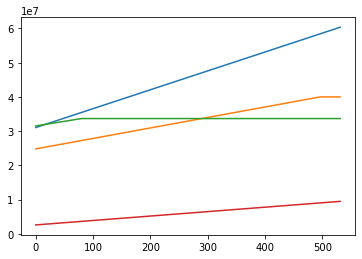

In [22]:
plt.plot(booster_doses2['19_49'])
plt.plot(booster_doses2['50_64'])
plt.plot(booster_doses2['65+'])
plt.plot(booster_doses2['12_18'])

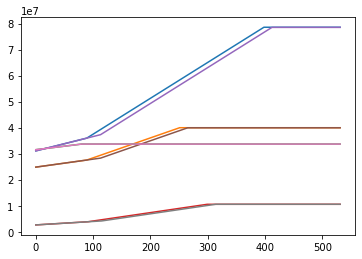

In [23]:
plt.plot(booster_doses3['19_49'])
plt.plot(booster_doses3['50_64'])
plt.plot(booster_doses3['65+'])
plt.plot(booster_doses3['12_18'])


plt.plot(booster_doses4['19_49'])
plt.plot(booster_doses4['50_64'])
plt.plot(booster_doses4['65+'])
plt.plot(booster_doses4['12_18'])

In [24]:
booster_doses2['65_diff'] = booster_doses2['65+'].diff().fillna(0)
booster_doses2['50_64_diff'] = booster_doses2['50_64'].diff().fillna(0)
booster_doses2['19_49_diff'] = booster_doses2['19_49'].diff().fillna(0)
booster_doses2['12_18_diff'] = booster_doses2['12_18'].diff().fillna(0)
booster_doses2['5_11_diff'] = booster_doses2['5_11'].diff().fillna(0) 

In [25]:
def set_vacc(state):
    deb_date = '02/07/2022'
    mid_date = '02/21/2022'
    end_date = '04/25/2022'
    data_dem = (get_pop(state, data_dem2, '0_4'), get_pop(state, data_dem2, '5_11'), get_pop(state, data_dem2, '12_18'), get_pop(state, data_dem2, '19_49'), get_pop(state, data_dem2, '50_64'), get_pop(state, data_dem2, '65+'))
    primary_series = primary(state)
    booster_dose = booster(state)
    booster_dose2 = booster2(state)
    booster_dose3 = booster3(state)
    return primary_series, booster_dose, booster_dose2, booster_dose3

In [32]:
primary_series, booster_dose, booster_dose2, booster_dose3 = set_vacc('US')

8551112
2187350.0


In [27]:
#primary_series.to_csv('')

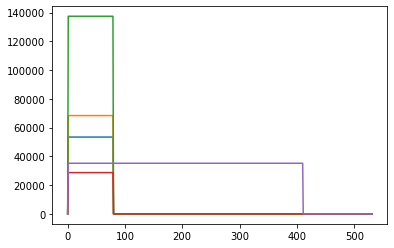

In [28]:

plt.plot(primary_series['65_diff'])

plt.plot(primary_series['50_64_diff'])

plt.plot(primary_series['19_49_diff'])
plt.plot(primary_series['12_18_diff'])
plt.plot(primary_series['5_11_diff'])

In [221]:
primary_series.to_csv('us_prim.csv')
booster_dose.to_csv('us_boost1.csv')
booster_dose2.to_csv('us_boost2.csv')
booster_dose3.to_csv('us_boost3.csv')